1. Introduction

This notebook performs the Exploratory Data Analysis (EDA) and preprocessing steps for the dissertation project on stroke risk prediction using the Healthcare Stroke Prediction Dataset. The goal is to understand the dataset structure, identify data quality issues, explore feature distributions, analyse relationships with the target variable, and prepare the data for machine learning models.

In [1]:
#load dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")

df= pd.read_csv(r"C:\Users\sahit\Onedrive - Southampton Solent University\COM726_Stroke_Dissertation\data\stroke_raw.csv")
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


The dataset is loaded into a Pandas Dataframe for further analysis. The first few rows are displayed to understand the structure and content.


3. Initial Exploration

In [2]:
# Dataset Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [3]:
#Summary Statistics
df.describe(include="all")


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


In [4]:
#Check class imbalance
df['stroke'].value_counts(normalize=True) * 100


0    95.127202
1     4.872798
Name: stroke, dtype: float64

4. Data Quality checks

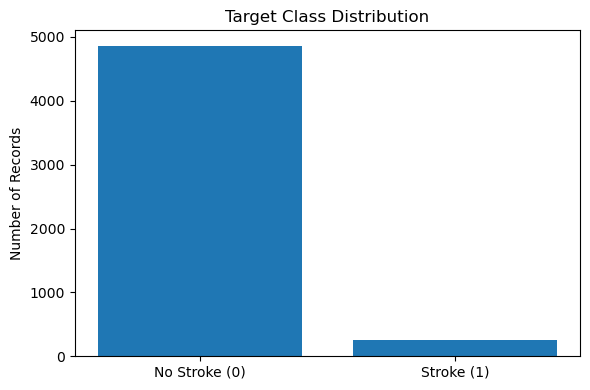

In [5]:
#bar graph for stroke vs non-stroke

labels = ['No Stroke (0)', 'Stroke (1)']
values = df['stroke'].value_counts().sort_index()

plt.figure(figsize=(6, 4))
plt.bar(labels, values)

plt.title('Target Class Distribution')
plt.ylabel('Number of Records')

plt.tight_layout()
plt.show()


In [6]:
#Missing values

df.isna().sum()


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
#duplicate check
df.duplicated().sum()


0

5. Univariate EDA
   

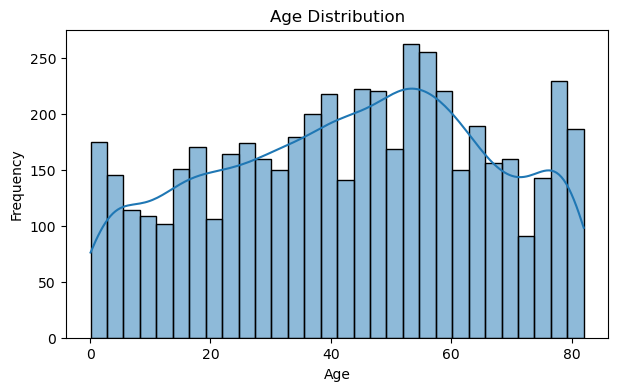

In [8]:
# Age distribution

plt.figure(figsize=(7,4))
sns.histplot(df["age"], bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

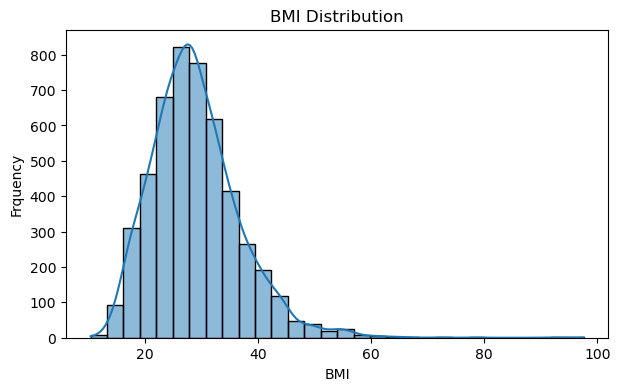

In [9]:
# BMI Distribution
plt.figure(figsize=(7,4))
sns.histplot(df["bmi"], bins=30, kde=True)
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Frquency")
plt.show()

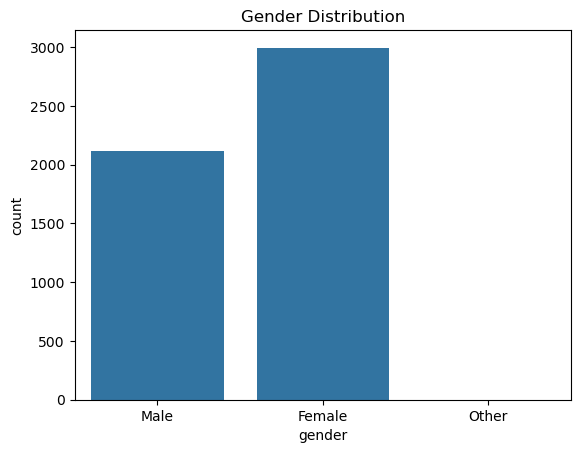

In [10]:
#Gender distribution

sns.countplot(data=df, x="gender")
plt.title("Gender Distribution")
plt.show()

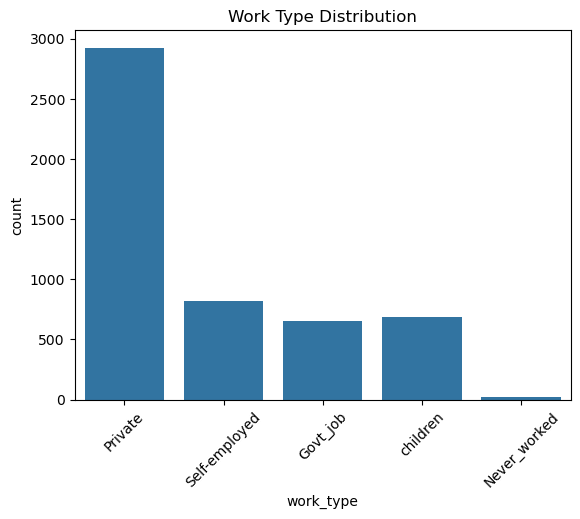

In [11]:
# Work type distribution

sns.countplot(data=df, x="work_type")
plt.xticks(rotation=45)
plt.title("Work Type Distribution")
plt.show()

6. Bivariate EDA (Stroke vs Features)


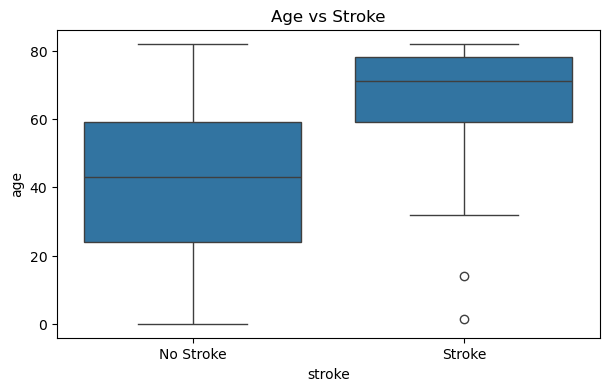

In [12]:
# Stroke vs Age (boxplot)

plt.figure(figsize=(7,4))
sns.boxplot(x="stroke", y="age", data=df)
plt.title("Age vs Stroke")
plt.xticks([0,1], ["No Stroke", "Stroke"])
plt.show()

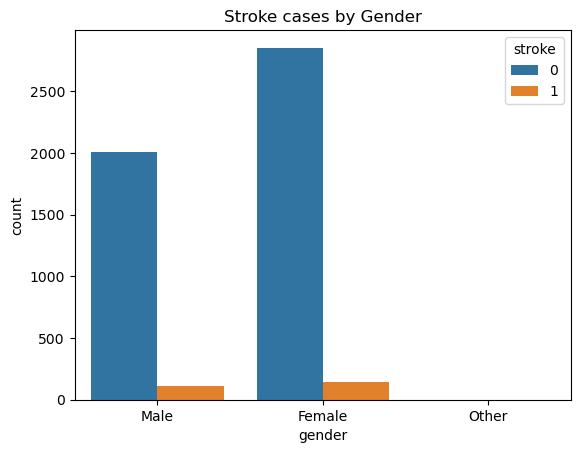

In [13]:
#Stroke vs Gender

sns.countplot(data = df, x="gender", hue="stroke")
plt.title("Stroke cases by Gender")
plt.show()


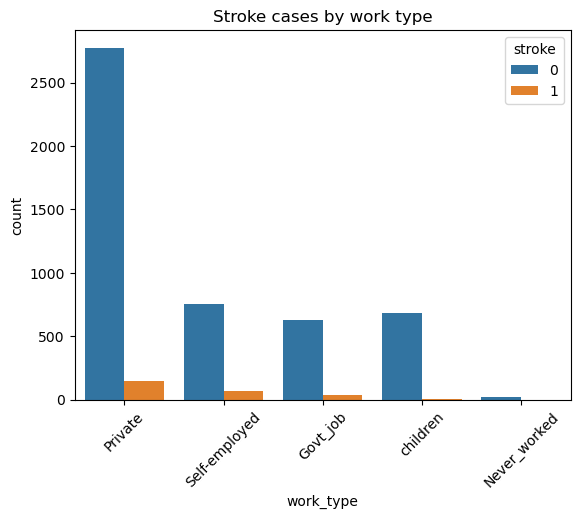

In [14]:
#Stroke vs Work Type
sns.countplot(data = df, x = "work_type", hue = "stroke")
plt.title("Stroke cases by work type")
plt.xticks(rotation=45)
plt.show()

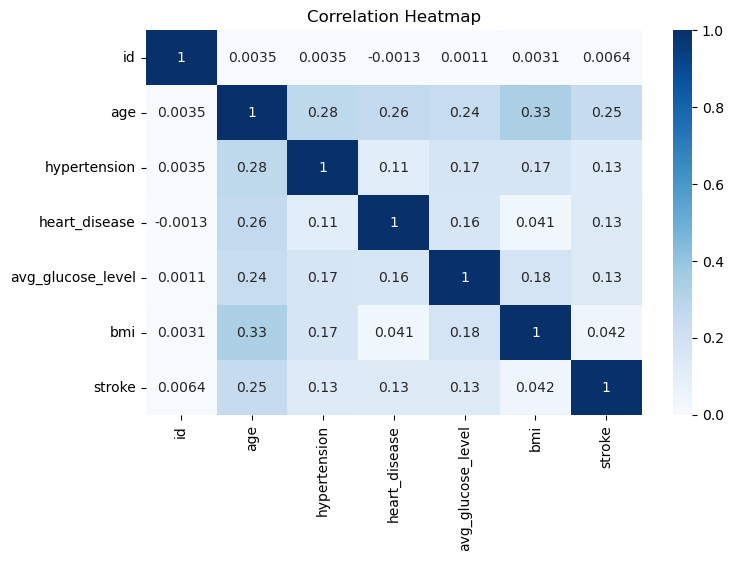

In [15]:
#Correlation heatmap(numeric only)
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()

7. Handling Missing Values (BMI)
   

In [16]:
df["bmi"].fillna(df["bmi"].median(), inplace=True)
df.isna().sum()


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Train-Test Split

In [17]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["stroke"])
y = df["stroke"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


Feature Engineering

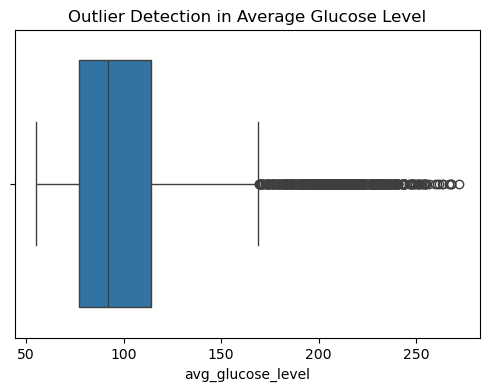

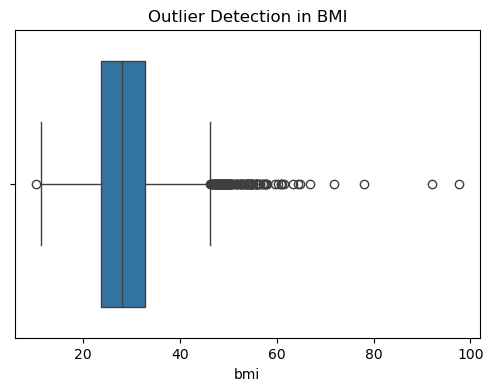

In [18]:
#step 1 - Outlier Detection (Medical Reasoning)
plt.figure(figsize = (6,4))
sns.boxplot(x=df["avg_glucose_level"])
plt.title("Outlier Detection in Average Glucose Level")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=df["bmi"])
plt.title("Outlier Detection in BMI")
plt.show()

In [19]:
#step 2 - outlier treatment 
df["avg_glucose_level"] = df["avg_glucose_level"].clip(upper=df["avg_glucose_level"].quantile(0.99))
df["bmi"] = df["bmi"].clip(upper=df["bmi"].quantile(0.99))


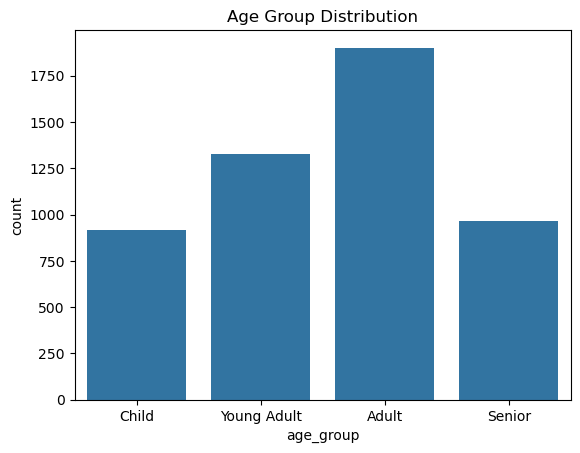

In [20]:
#step 3 - create an age group feature
df["age_group"] = pd.cut(
    df["age"],
    bins=[0, 18, 40, 65, 120],
    labels=["Child", "Young Adult", "Adult", "Senior"]
)
sns.countplot(data=df, x="age_group")
plt.title("Age Group Distribution")
plt.show()


In [21]:
df.to_csv("../data/stroke_clean.csv", index=False)



In [23]:
#stroke vs age HeatMap (Risk Pattern)

plt.figure(figsize=(7, 5))
sns.histplot(
    data=df,
    x="age",
    hue="stroke",
    bins=20,
    kde=True,
    palette=["#4CAF50", "#F44336"]
)

plt.title("Age Distribution by Stroke Outcome")
plt.xlabel("Age")
plt.ylabel("Count")

plt.savefig("../figures/age_vs_stroke_distribution.png", dpi=300)
plt.close()

print("Saved: age_vs_stroke_distribution.png")



Saved: age_vs_stroke_distribution.png


In [24]:
#BMI vs Stroke HeatMap (density Map)
plt.figure(figsize=(7, 5))
sns.kdeplot(
    data=df,
    x="bmi",
    hue="stroke",
    fill=True,
    common_norm=False,
    alpha=0.6
)

plt.title("BMI Density by Stroke Outcome")
plt.xlabel("BMI")

plt.savefig("../figures/bmi_vs_stroke_density.png", dpi=300)
plt.close()

print("Saved: bmi_vs_stroke_density.png")


Saved: bmi_vs_stroke_density.png


In [25]:
#Glucose vs Age Heatmap (joint HeatMap)

plt.figure(figsize=(7, 5))
sns.histplot(
    data=df,
    x="age",
    y="avg_glucose_level",
    bins=30,
    pthresh=0.1,
    cmap="mako"
)

plt.title("Age vs Average Glucose Level (Heatmap)")
plt.xlabel("Age")
plt.ylabel("Average Glucose Level")

plt.savefig("../figures/age_vs_glucose_heatmap.png", dpi=300)
plt.close()

print("Saved: age_vs_glucose_heatmap.png")



Saved: age_vs_glucose_heatmap.png


In [29]:

import os
os.makedirs("../figures", exist_ok=True)

num_cols = df.select_dtypes(include=["int64", "float64"])

plt.figure(figsize=(8, 6))
sns.heatmap(
    num_cols.corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)

plt.title("Feature Correlation Heatmap")
plt.tight_layout()

plt.savefig("../figures/correlation_heatmap.png", dpi=300)
plt.close()

print("Saved: correlation_heatmap.png")

Saved: correlation_heatmap.png
